# Obsługa danych i podstawy implementacji obliczeń

Korzystając z materiałów dr Drapały pobieram dane z Wikipedii odnośnie najbardziej zaludnionych miast Europy. 

In [25]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

URL = "https://en.wikipedia.org/wiki/List_of_European_cities_by_population_within_city_limits"
resp = requests.get(URL) 
if resp.status_code == 200:
    soup = BeautifulSoup(resp.content,'html.parser')
    tab = soup.find('table',{'class':"wikitable"})
df = pd.read_html(str(tab))[0]
df =df.loc[:, 'City':'Officialpopulation':]
df.replace(to_replace={'[[a]]':"",'[[b]]':""}, regex=True,inplace=True)
df.replace(to_replace='[[,]', value="", regex=True,inplace=True)
for i in range(len(df['Officialpopulation'])):
    df['Officialpopulation'][i-1] = float("{:.2f}".format(int(df['Officialpopulation'][i])/1000000))
df = df[:10]
df

,City,Country,Officialpopulation
0,Istanbul,Turkey,12.63
1,Moscow,Russia,9.0
2,London,United Kingdom,5.38
3,Saint Petersburg,Russia,3.66
4,Berlin,Germany,3.31
5,Madrid,Spain,2.92
6,Kyiv,Ukraine,2.84
7,Rome,Italy,2.16
8,Bucharest,Romania,2.14
9,Paris,France,2.01


Po wczytaniu danych, konieczne było usunięcie wystąpień [a],[b] oraz przecinki oddzielające liczby za pomocą metody replace.
Następnie przedstawiam dane na wykresie za pomocą poniższego kodu.

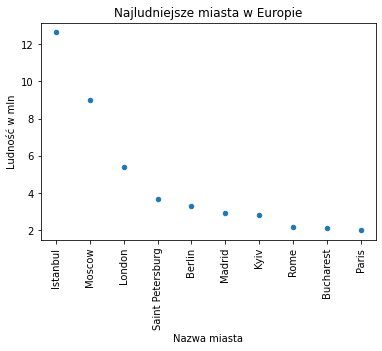

In [26]:
import matplotlib.pyplot as plt

citiesPlot = df.plot(x='City', y='Officialpopulation', kind='scatter', title='Najludniejsze miasta w Europie')
plt.xticks(rotation=90)
citiesPlot.set_xlabel('Nazwa miasta')
citiesPlot.set_ylabel('Ludność w mln')
plt.show()

Na zakończenie policzmy średnie zaludnienie w 10. najludniejszych miastach Europy:

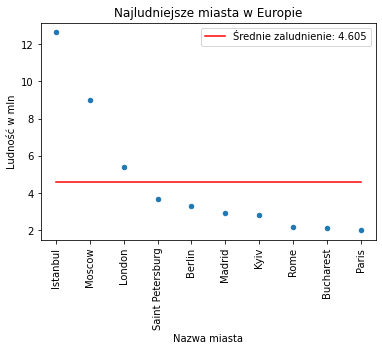

In [35]:
avr = df["Officialpopulation"].mean()
avrTab = []
for i in range(10):
    avrTab.append(avr)
citiesPlot = df.plot(x='City', y='Officialpopulation', kind='scatter', title='Najludniejsze miasta w Europie')
plt.xticks(rotation=90)
citiesPlot.set_xlabel('Nazwa miasta')
citiesPlot.set_ylabel('Ludność w mln')

avrPlot = pd.DataFrame(avrTab, columns = ['Średnie zaludnienie: ' + str(avr)])
avrPlot.plot(ax=citiesPlot,color='#FF0000')
plt.xticks(citiesPlot.get_xticks(), rotation = 90)
plt.show()